# **By Manual Processing**


Mean Vector of Class 1: [3.  3.6]

Mean Vector of Class 2: [8.4 7.6]

Within-Class Scatter Matrix of Class 1:
 [[ 4.  -2. ]
 [-2.  13.2]]

Within-Class Scatter Matrix of Class 2:
 [[ 9.2 -0.2]
 [-0.2 13.2]]

After Combining Within-Class Scatter Matrix:
 [[13.2 -2.2]
 [-2.2 26.4]]

Mean Difference:
 [[-5.4]
 [-4. ]]

Between-Class Scatter Matrix:
 [[29.16 21.6 ]
 [21.6  16.  ]]

Eigenvalue 1: 3.1313700384122924
Eigenvector 1: [0.91955932 0.39295122]

Eigenvalue 2: 0.0
Eigenvector 2: [-0.59522755  0.80355719]

Sorted Eigenvalues:
 [3.13137004 0.        ]

Sorted Eigenvectors:
 [[ 0.91955932 -0.59522755]
 [ 0.39295122  0.80355719]]

Selected Eigenvector:
 [[0.91955932]
 [0.39295122]]


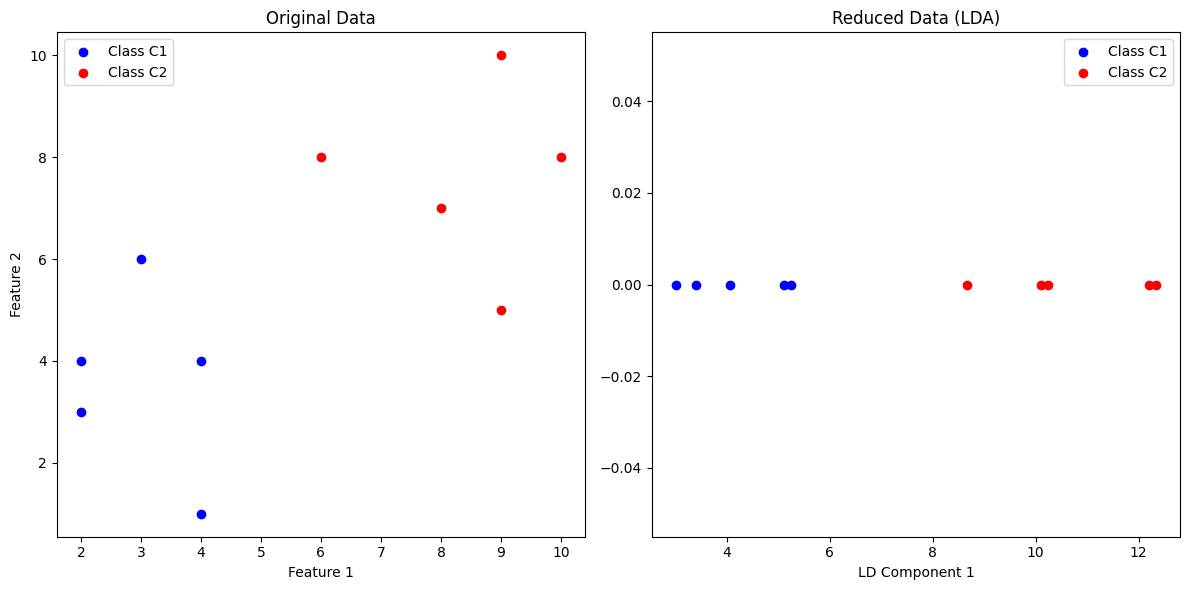

In [89]:
# Importing Required Libraries
import numpy as np
from numpy.linalg import inv, eig
import matplotlib.pyplot as plt

# Classes Given in 2D Dataset
C1 = np.array([[4,1],
              [2,4],
              [2,3],
              [3,6],
              [4,4]])

C2 = np.array([[9,10],
              [6,8],
              [9,5],
              [8,7],
              [10,8]])

# Calculating the Mean Vectors for each Class
mean_C1 = np.array(np.mean(C1, axis=0), dtype=float)
mean_C2 = np.array(np.mean(C2, axis=0), dtype=float)
print("\nMean Vector of Class 1:", mean_C1)
print("\nMean Vector of Class 2:", mean_C2)

# Function for Calculating Within-Class Scatter Matrix
def compute_scatter_matrix(X, mean_X):
    scatter_matrix = np.zeros((2, 2))
    for x in X:
        x_minus_mean = (x - mean_X).reshape(-1, 1)
        scatter_matrix += x_minus_mean @ x_minus_mean.T
    return scatter_matrix

# Calculating Within-Class Scatter Matrix
S_W1 = compute_scatter_matrix(C1, mean_C1)
S_W2 = compute_scatter_matrix(C2, mean_C2)
print("\nWithin-Class Scatter Matrix of Class 1:\n", S_W1)
print("\nWithin-Class Scatter Matrix of Class 2:\n", S_W2)

# Combining Within-Class Scatter Matrices
S_W = S_W1 + S_W2
print("\nAfter Combining Within-Class Scatter Matrix:\n", S_W)

# Calculating Between-Class Scatter Matrix
mean_diff = (mean_C1 - mean_C2).reshape(-1, 1)
print("\nMean Difference:\n", mean_diff)
S_B = mean_diff @ mean_diff.T
print("\nBetween-Class Scatter Matrix:\n", S_B)

# Computing the solutions to the Generalized Eigenvalue problem
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(S_W) @ S_B)
for i in range(len(eigenvalues)):
    eigenvalue = eigenvalues[i]
    eigenvector = eigenvectors[:, i]
    print(f"\nEigenvalue {i + 1}: {eigenvalue}")
    print(f"Eigenvector {i + 1}: {eigenvector}")

# Sorting Eigenvalues and Eigenvectors in Descending Order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sorted_indices]
eigenvalues = eigenvalues[sorted_indices]
print("\nSorted Eigenvalues:\n", eigenvalues)
print("\nSorted Eigenvectors:\n", eigenvectors)

# Selecting the Top Eigenvector (for 1D reduction)
W = eigenvectors[:, 0].reshape(-1, 1)
print("\nSelected Eigenvector:\n", W)

# Projecting the Data onto the New Space
X = np.vstack([C1, C2])
y = np.hstack([np.zeros(len(C1)), np.ones(len(C2))])
X_lda = X @ W

# Plotting the Scatter Plots to Display the Transformation
plt.figure(figsize=(12, 6))

# Plotting the Original Data
plt.subplot(1, 2, 1)
plt.scatter(C1[:, 0], C1[:, 1], color='blue', label='Class C1')
plt.scatter(C2[:, 0], C2[:, 1], color='red', label='Class C2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data')
plt.legend()

# Plot the Reduced Data
plt.subplot(1, 2, 2)
plt.scatter(X_lda[y == 0], np.zeros_like(X_lda[y == 0]), color='blue', label='Class C1')
plt.scatter(X_lda[y == 1], np.zeros_like(X_lda[y == 1]), color='red', label='Class C2')
plt.xlabel('LD Component 1')
plt.title('Reduced Data (LDA)')
plt.legend()

# Displaying the Plot
plt.tight_layout()
plt.show()

# **By Using Libraries**

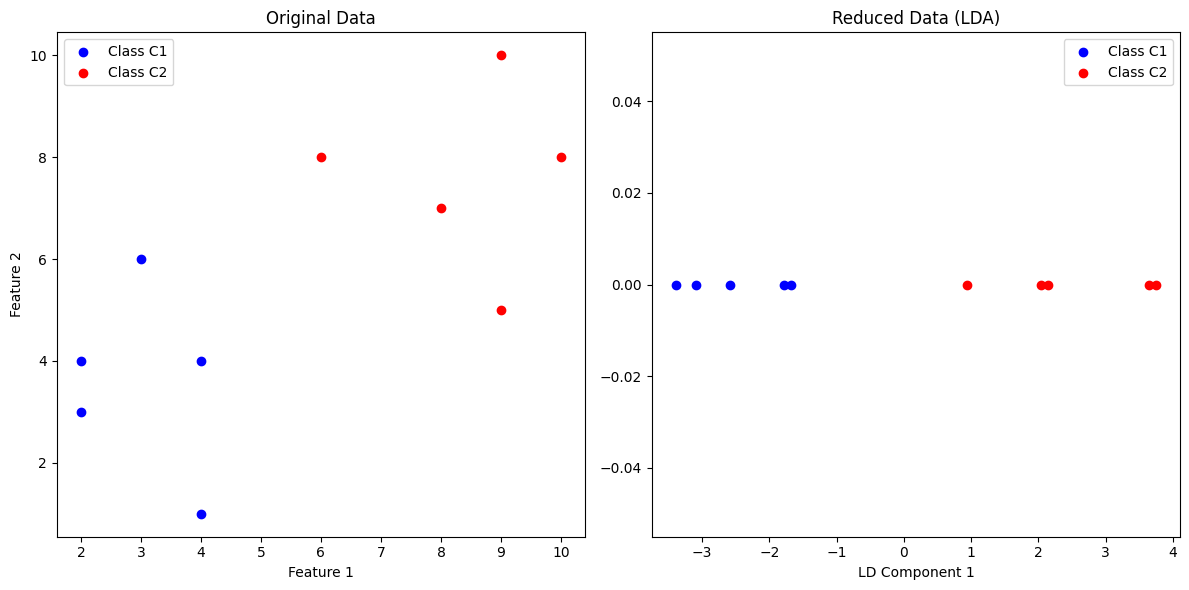

In [90]:
# Importing Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Defining The Dataset
C1 = np.array([[4, 1], [2, 4], [2, 3], [3, 6], [4, 4]])
C2 = np.array([[9, 10], [6, 8], [9, 5], [8, 7], [10, 8]])

# Combining The Data And Creating Labels
X = np.vstack([C1, C2])
y = np.array([0] * C1.shape[0] + [1] * C2.shape[0])  # 0 for Class 1, 1 for Class 2

# Applying Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=1)  # Reduce to 1D
X_lda = lda.fit_transform(X, y)

# Plotting the Scatter Plots to Display the Transformation
plt.figure(figsize=(12, 6))

# Plotting the Original Data
plt.subplot(1, 2, 1)
plt.scatter(C1[:, 0], C1[:, 1], color='blue', label='Class C1')
plt.scatter(C2[:, 0], C2[:, 1], color='red', label='Class C2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data')
plt.legend()

# Plot the Reduced Data
plt.subplot(1, 2, 2)
plt.scatter(X_lda[y == 0], np.zeros_like(X_lda[y == 0]), color='blue', label='Class C1')
plt.scatter(X_lda[y == 1], np.zeros_like(X_lda[y == 1]), color='red', label='Class C2')
plt.xlabel('LD Component 1')
plt.title('Reduced Data (LDA)')
plt.legend()

# Displaying the Plot
plt.tight_layout()
plt.show()